# Keras
[Examples](https://keras.io/examples/)

```pip install tensorflow```

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
#print(iris.DESCR)
X = iris.data
y = iris.target

In [3]:
# encode target to one-hot
from keras.utils import to_categorical
y = to_categorical(y)

In [4]:
# Split test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler_object = MinMaxScaler()
scaler_object.fit(X_train)
scaled_X_train = scaler_object.transform(X_train)
scaled_X_test = scaler_object.transform(X_test)

In [5]:
# Building Network 
from keras.layers import Dense

model = keras.Sequential()
model.add(Dense(8, input_dim=4, activation='relu')) # Input layer
model.add(Dense(8, input_dim=4, activation='relu')) # Hidden layer
model.add(Dense(3, activation='softmax')) # Output layer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [12]:
from keras.callbacks import EarlyStopping
#from keras.callbacks import ModelCheckpoint

# Train and Predict
batch_size = 128
epochs = 175

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
#mc = ModelCheckpoint('models/best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit
history = model.fit(scaled_X_train, y_train, batch_size=batch_size, 
                    epochs=epochs, validation_split=0.2, verbose=1)

# Spits out probabilities by default
predictions = np.argmax(model.predict(scaled_X_test), axis=-1)
#predictions = model.predict_classes(scaled_X_test)

uracy: 0.7000
Epoch 35/175
1/1 [==============================] - 0s 73ms/step - loss: 0.7417 - accuracy: 0.7875 - val_loss: 0.7374 - val_accuracy: 0.7000
Epoch 36/175
1/1 [==============================] - 0s 106ms/step - loss: 0.7398 - accuracy: 0.7875 - val_loss: 0.7358 - val_accuracy: 0.7500
Epoch 37/175
1/1 [==============================] - 0s 135ms/step - loss: 0.7378 - accuracy: 0.7875 - val_loss: 0.7341 - val_accuracy: 0.7500
Epoch 38/175
1/1 [==============================] - 0s 83ms/step - loss: 0.7358 - accuracy: 0.7875 - val_loss: 0.7325 - val_accuracy: 0.7500
Epoch 39/175
1/1 [==============================] - 0s 84ms/step - loss: 0.7338 - accuracy: 0.7875 - val_loss: 0.7308 - val_accuracy: 0.7500
Epoch 40/175
1/1 [==============================] - 0s 102ms/step - loss: 0.7318 - accuracy: 0.8125 - val_loss: 0.7292 - val_accuracy: 0.7500
Epoch 41/175
1/1 [==============================] - 0s 81ms/step - loss: 0.7299 - accuracy: 0.8125 - val_loss: 0.7275 - val_accuracy: 0.7

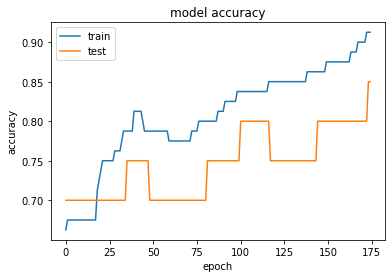

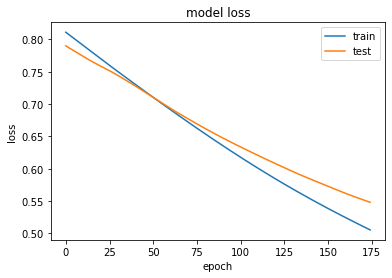

In [13]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [9]:
# Evaluate
from sklearn import metrics
# .argmax(axis=1) transform one-hot back to category 
print(metrics.confusion_matrix(y_test.argmax(axis=1),predictions))
print(metrics.classification_report(y_test.argmax(axis=1),predictions))

[[19  0  0]
 [ 0  0 15]
 [ 0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.00      0.00      0.00        15
           2       0.52      1.00      0.68        16

    accuracy                           0.70        50
   macro avg       0.51      0.67      0.56        50
weighted avg       0.55      0.70      0.60        50

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# Save
model.save('models/myfirstmodel.h5')

In [11]:
# Load
from keras.models import load_model
#checkpoint_model = load_model('best_model.h5')
newmodel = load_model('models/myfirstmodel.h5')
np.argmax(newmodel.predict(scaled_X_test), axis=-1)

array([2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2], dtype=int64)

## Learning curves

**error (dev set, train set) vs m (training set size)** : tells if more data is needed to reach acceptable level of error




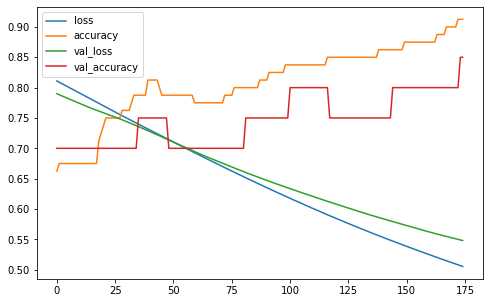

In [14]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5));

### Reducing Bias
- Increase the model size
- Add features aim at the bias
- Reduce regularization
- Modify model architecture

### Reducing variance
- Add more data
- Add regularization
- Early stopping (decrease tolerance)
- Feature selection (reduction)
- Decrease model size